In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def smooth(seq):
    m = 10
    n = len(seq)
    res = []
    for i in range(n-m):
        if i == 120000:
            print(seq[i])
        sum_ = 0
        for j in range(m):
            sum_ += seq[i+j]
        res.append(sum_/m)
    return res

In [5]:
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_bs-128_lr-4|16k|19k.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_af_128_3.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_af_128_3|20k.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_lfw_sm_128_3.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_wf_sm_128_2.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_lfw_af-1_256_2.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_lfw_af-2_flip_256_2.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_wf_af-1_256_2.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_wf_af-1_256_lr2e3_2|40k.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_wf_af-1_256_lr1e3_2|60k.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_wf_af05_64_128_lr1e3_2|60k.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_nVgg16_base_aug_DP05_2|90k.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_224_mtwfc_base_flip_2|200k.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_224_mtwfc_base_flip_2|200k.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_224_mtwfc_base_flip_2|200k.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16-T_base_2|200k.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_256D_wf_af-5e-2.log'
# log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_Vgg16_+256_af-5e-2.log'
log_path = '/data/shenzhonghai/FaceClustering/logs/train_log_resnet50_demo.log'

In [6]:
acc = []
loss = []
with open(log_path, 'r') as f:
    for st in f.readlines():
        if re.search('iters', st) is None:
            continue
        loc = re.search(r'loss: [\d]*\.[\d]*', st).span()
        loss.append(float(st[loc[0]+6:loc[1]]))
        loc = re.search(r'acc: [\d]*\.[\d]', st).span()
        acc.append(float(st[loc[0]+5:loc[1]]))
loss = smooth(loss)
acc = smooth(acc)
print(log_path)

/data/shenzhonghai/FaceClustering/logs/train_log_resnet50_demo.log


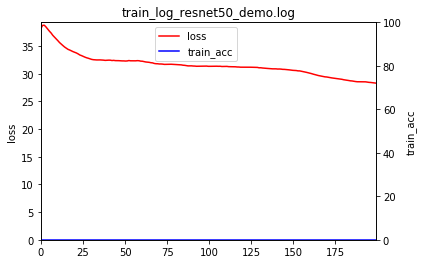

In [7]:
iterations = len(acc)
x = np.linspace(0, iterations, iterations)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, loss, label='loss', color='r')
ax2.plot(x, acc, label='train_acc', color='b')
ax1.set_xlim(0, iterations)
ax1.set_ylim(0., )
ax2.set_ylim(0., 100.)
ax1.set_ylabel('loss')
ax2.set_ylabel('train_acc')
plt.xlabel('iterations')
plt.title(log_path.split('/')[-1])
fig.legend(bbox_to_anchor=(0.6, 1.), bbox_transform=ax1.transAxes)

plt.show()